## 상관분석

- 수치형 변수들만 가지고 성혼 유무/ 성혼 실패 / 차단 회원 상관관계 파악해보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Clustering.ipynb',
 'Corrleation Comparsion.ipynb',
 'Data Merge.ipynb',
 'Factor Analysis.ipynb',
 'Feature Selection.ipynb',
 'final_thank.csv',
 'find_mem_no.csv',
 'force_resampling.csv',
 'member data Preprocessing.ipynb',
 'member.csv',
 'member_mate.csv',
 'middel_member.csv',
 'Ramdom sampling.ipynb',
 'Random Sampling.ipynb',
 'reample_csv',
 'Selecting Feature.ipynb',
 'Sucess_user_EDA.ipynb',
 'suc_df.csv',
 'suc_df_1768.csv',
 'suc_df_eda.csv',
 'Thanks data Preprocessing.ipynb',
 'thank_mem.csv',
 'Total data Preprocessing.ipynb',
 'total_df.csv']

In [3]:
resample = pd.read_csv('reample_csv')
print(resample.shape[0])
resample.head()

1768


,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,list_prt_yn,my_hd_item_yn,my_hd_yn,ins_date,upd_date,today,term,age,age_cate_detail,age_cate
0,1572407,f,n,n12,1998,7,6,w,y,y,...,y,n,n,2021-05-29 21:59:35,2021-05-29 21:59:35,2022-04-20 18:06:42,325,25,20대 중,20대
1,1542770,f,n,n01,1998,9,6,w,y,y,...,y,n,n,2021-04-26 12:56:54,2021-04-26 12:56:54,2022-04-20 18:06:42,359,25,20대 중,20대
2,1749993,f,b,b08,1997,1,5,w,y,y,...,n,n,n,2022-01-09 14:06:38,2022-01-09 14:06:43,2022-04-20 18:06:42,101,26,20대 중,20대
3,1795208,f,c,c07,2003,1,11,w,y,y,...,y,n,n,2022-03-07 08:07:39,2022-03-22 22:16:57,2022-04-20 18:06:42,44,20,20대 초,20대
4,1815315,f,c,c16,2003,1,11,w,y,y,...,n,n,n,2022-04-01 22:59:40,2022-04-01 22:59:40,2022-04-20 18:06:42,18,20,20대 초,20대


In [4]:
suc_data = pd.read_csv('suc_df_1768.csv')
print(suc_data.shape[0])
suc_data.head(3)

1768


,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mem_last_name_code,rprsn_mov_yn,...,conts_upd_cnt,secret_item_yn,secret_yn,family_conts_upd_cnt,my_point_cont,my_hd_item_yn,my_hd_yn,ins_date,upd_date,exit_date
0,1399463,m,b,b36,1964,6,8,r,3,n,...,4,n,n,1,85.0,n,n,2020-12-14 11:21:19,2020-12-15 18:54:39,2021-01-08 15:43:15
1,1389346,m,c,c04,1994,6,2,w,44,n,...,4,n,n,0,60.0,n,n,2020-12-04 02:38:41,2020-12-23 01:49:35,2021-01-09 01:34:14
2,1331957,m,i,i01,1958,2,2,r,2,n,...,19,n,n,6,90.0,n,n,2020-10-04 23:23:56,2021-01-09 09:59:12,2021-02-12 03:50:48


In [5]:
force_data = pd.read_csv('force_resampling.csv')
print(force_data.shape[0])
force_data.head(3)

1768


,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,list_prt_yn,my_hd_item_yn,my_hd_yn,ins_date,upd_date,today,term,age,age_cate_detail,age_cate
0,1665994,f,o,o13,1998,9,6,w,y,n,...,y,n,n,2021-09-23 18:33:11,2022-02-21 21:36:01,2022-04-20 18:06:42,208,25,20대 중,20대
1,1721468,f,o,o04,1998,8,6,w,y,y,...,y,n,n,2021-12-04 00:54:57,2021-12-04 01:39:57,2022-04-20 18:06:42,137,25,20대 중,20대
2,1427572,f,k,k04,1998,12,6,r,y,y,...,y,n,n,2021-01-16 23:34:36,2021-07-25 15:24:16,2022-04-20 18:06:42,458,25,20대 중,20대


In [6]:
resample['suc_yn']= 0
suc_data['suc_yn'] = 1
force_data['suc_yn'] = -1

-----

### 비교?

In [7]:
total = pd.concat([resample,suc_data])
total = pd.concat([total,force_data])
total.reset_index(drop=True, inplace=True)
total.head()

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,my_hd_yn,ins_date,upd_date,today,term,age,age_cate_detail,age_cate,suc_yn,exit_date
0,1572407,f,n,n12,1998,7,6,w,y,y,...,n,2021-05-29 21:59:35,2021-05-29 21:59:35,2022-04-20 18:06:42,325.0,25.0,20대 중,20대,0,NaN
1,1542770,f,n,n01,1998,9,6,w,y,y,...,n,2021-04-26 12:56:54,2021-04-26 12:56:54,2022-04-20 18:06:42,359.0,25.0,20대 중,20대,0,NaN
2,1749993,f,b,b08,1997,1,5,w,y,y,...,n,2022-01-09 14:06:38,2022-01-09 14:06:43,2022-04-20 18:06:42,101.0,26.0,20대 중,20대,0,NaN
3,1795208,f,c,c07,2003,1,11,w,y,y,...,n,2022-03-07 08:07:39,2022-03-22 22:16:57,2022-04-20 18:06:42,44.0,20.0,20대 초,20대,0,NaN
4,1815315,f,c,c16,2003,1,11,w,y,y,...,n,2022-04-01 22:59:40,2022-04-01 22:59:40,2022-04-20 18:06:42,18.0,20.0,20대 초,20대,0,NaN


In [8]:
total_df = total[['mem_no', 'mem_birth_year','mem_birth_month', 'photo_cnt',
       'mate_height', 'mate_weight', 'mate_offspring_m', 'mate_offspring_f',
       'divorce_year', 'upd_cnt', 'conts_upd_cnt',
       'family_conts_upd_cnt', 'my_point_cont', 'suc_yn']]

In [9]:
total_df.head(3)

,mem_no,mem_birth_year,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,suc_yn
0,1572407,1998,7,0,166,51,0,0,NaN,1,0,0,46.0,0
1,1542770,1998,9,2,160,60,0,0,NaN,1,0,0,50.0,0
2,1749993,1997,1,0,160,53,0,0,NaN,2,0,0,53.0,0


In [24]:
total_df.to_csv('feature_selection.csv',index=False)

In [10]:
total_df.isnull().sum()

mem_no                     0
mem_birth_year             0
mem_birth_month            0
photo_cnt                  0
mate_height                0
mate_weight                0
mate_offspring_m           0
mate_offspring_f           0
divorce_year            1611
upd_cnt                    0
conts_upd_cnt              0
family_conts_upd_cnt       0
my_point_cont              0
suc_yn                     0
dtype: int64

In [11]:
total_df['divorce_year'] = total_df['divorce_year'].fillna(0)
total_df['divorce_year'].value_counts()

C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.0       1611
2011.0    1028
2012.0     378
2010.0     311
2015.0     297
2017.0     240
2018.0     234
2016.0     219
2019.0     211
2014.0     194
2013.0     183
2020.0     133
2009.0     118
2021.0     117
2008.0      23
2022.0       7
Name: divorce_year, dtype: int64

In [12]:
total_df = total_df.astype(int)
total_df.head(3)

,mem_no,mem_birth_year,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,suc_yn
0,1572407,1998,7,0,166,51,0,0,0,1,0,0,46,0
1,1542770,1998,9,2,160,60,0,0,0,1,0,0,50,0
2,1749993,1997,1,0,160,53,0,0,0,2,0,0,53,0


In [20]:
t1 = total_df[total_df['suc_yn']==0]
t2 = total_df[total_df['suc_yn']==-1]
t3 = total_df[total_df['suc_yn']==1]

-----
### `상관관계`

In [13]:
total_df.corr()

,mem_no,mem_birth_year,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,suc_yn
mem_no,1.000000,0.078904,-0.028348,-0.106364,-0.078461,-0.085978,0.007315,-0.024975,0.041083,-0.033374,-0.143514,-0.148727,-0.071986,0.174935
mem_birth_year,0.078904,1.000000,-0.000649,-0.001313,0.058538,-0.007858,-0.353234,-0.285997,-0.538379,-0.001296,-0.025478,-0.060727,-0.060621,-0.000093
mem_birth_month,-0.028348,-0.000649,1.000000,-0.002523,-0.042007,-0.027092,0.018883,0.003328,-0.005557,-0.016418,0.017865,-0.007176,0.017618,-0.016681
photo_cnt,-0.106364,-0.001313,-0.002523,1.000000,0.140136,0.110838,0.003893,0.007836,0.011708,0.042824,0.191749,0.149916,0.096486,0.036534
mate_height,-0.078461,0.058538,-0.042007,0.140136,1.000000,0.760269,-0.122010,-0.092617,-0.144078,0.030059,0.048339,0.054104,0.057165,0.009287
mate_weight,-0.085978,-0.007858,-0.027092,0.110838,0.760269,1.000000,-0.069951,-0.038313,-0.073965,0.017096,0.024353,0.032802,-0.007495,0.015977
mate_offspring_m,0.007315,-0.353234,0.018883,0.003893,-0.122010,-0.069951,1.000000,0.116289,0.442241,-0.012491,-0.008686,0.022816,0.019506,0.047248
mate_offspring_f,-0.024975,-0.285997,0.003328,0.007836,-0.092617,-0.038313,0.116289,1.000000,0.416322,-0.003765,0.011514,0.019921,0.039035,0.059373
divorce_year,0.041083,-0.538379,-0.005557,0.011708,-0.144078,-0.073965,0.442241,0.416322,1.000000,-0.010481,0.024220,0.042660,0.039545,0.138361
upd_cnt,-0.033374,-0.001296,-0.016418,0.042824,0.030059,0.017096,-0.012491,-0.003765,-0.010481,1.000000,0.230679,0.046451,0.018683,-0.025170


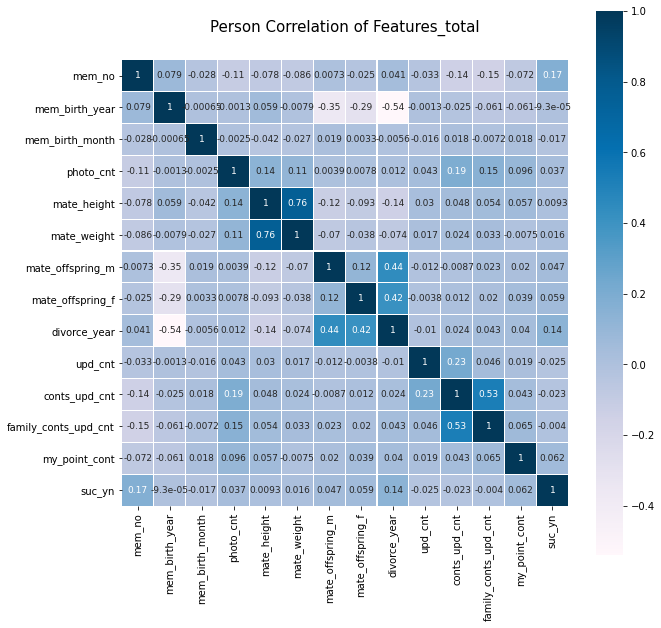

In [15]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features_total", y = 1.05, size = 15)
sns.heatmap(total_df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 9});

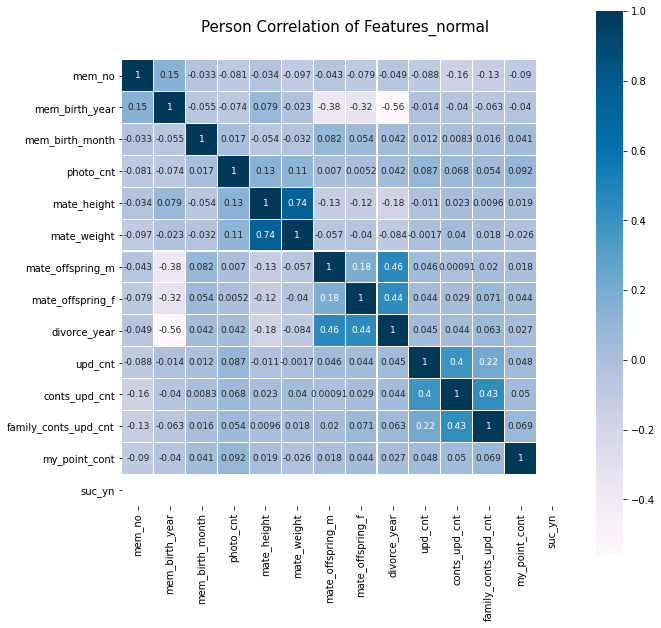

In [18]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features_normal", y = 1.05, size = 15)
sns.heatmap(t1.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 9});

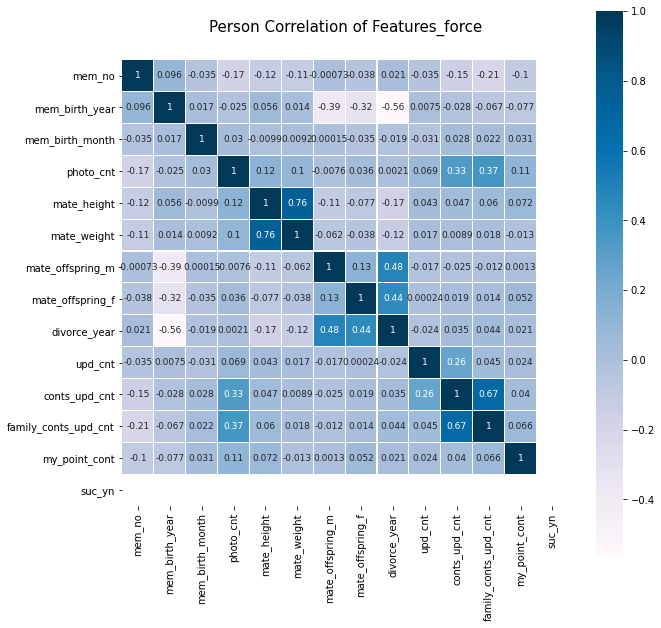

In [19]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features_force", y = 1.05, size = 15)
sns.heatmap(t2.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 9});

In [22]:
t3.corr()

,mem_no,mem_birth_year,mem_birth_month,photo_cnt,mate_height,mate_weight,mate_offspring_m,mate_offspring_f,divorce_year,upd_cnt,conts_upd_cnt,family_conts_upd_cnt,my_point_cont,suc_yn
mem_no,1.000000,-0.040800,-0.004701,-0.099943,-0.099373,-0.069151,0.050791,0.024538,0.103708,-0.046246,-0.131801,-0.152525,-0.067412,NaN
mem_birth_year,-0.040800,1.000000,0.035612,0.095417,0.041829,-0.014363,-0.294106,-0.217631,-0.519522,-0.033904,-0.011948,-0.055487,-0.065225,NaN
mem_birth_month,-0.004701,0.035612,1.000000,-0.054117,-0.062646,-0.060459,-0.021906,-0.007294,-0.039142,0.000353,0.009369,-0.048550,-0.019931,NaN
photo_cnt,-0.099943,0.095417,-0.054117,1.000000,0.160789,0.111369,0.000602,-0.024641,-0.045762,0.006695,0.088530,0.089688,0.075202,NaN
mate_height,-0.099373,0.041829,-0.062646,0.160789,1.000000,0.781948,-0.137018,-0.083350,-0.098346,0.045624,0.083436,0.089184,0.079179,NaN
mate_weight,-0.069151,-0.014363,-0.060459,0.111369,0.781948,1.000000,-0.097726,-0.041026,-0.030457,0.049290,0.041724,0.056356,0.009228,NaN
mate_offspring_m,0.050791,-0.294106,-0.021906,0.000602,-0.137018,-0.097726,1.000000,0.039508,0.370800,-0.032533,0.010388,0.047467,0.025069,NaN
mate_offspring_f,0.024538,-0.217631,-0.007294,-0.024641,-0.083350,-0.041026,0.039508,1.000000,0.351174,-0.031572,-0.011302,-0.020931,0.007188,NaN
divorce_year,0.103708,-0.519522,-0.039142,-0.045762,-0.098346,-0.030457,0.370800,0.351174,1.000000,0.025160,-0.008403,0.022229,0.034653,NaN
upd_cnt,-0.046246,-0.033904,0.000353,0.006695,0.045624,0.049290,-0.032533,-0.031572,0.025160,1.000000,0.149619,0.104846,0.023621,NaN


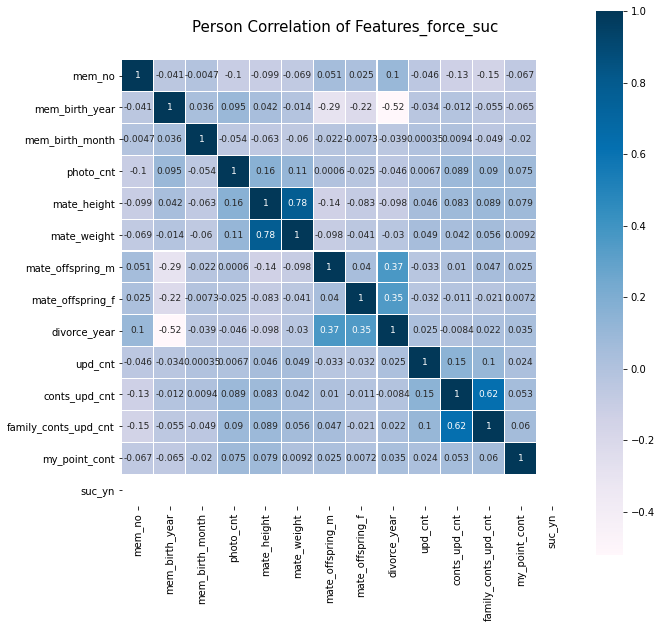

In [21]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 10))
plt.title("Person Correlation of Features_force_suc", y = 1.05, size = 15)
sns.heatmap(t3.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True,
            annot_kws = {"size" : 9});